In [93]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from test_utils import *
from public_tests import *
import copy
import math

%matplotlib inline

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.

* You have historical data from previous applicants that you can use as a training set for logistic regression.
* For each training example, you have the applicant’s scores on two exams and the admissions decision.
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

In [94]:
X_train, y_train = load_data("data/ex2data1.txt")

In [95]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [96]:
y_train[:5]

array([0., 0., 0., 1., 1.])

In [97]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    

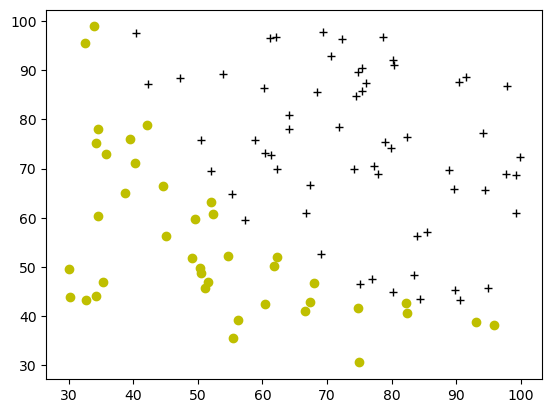

In [98]:
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")


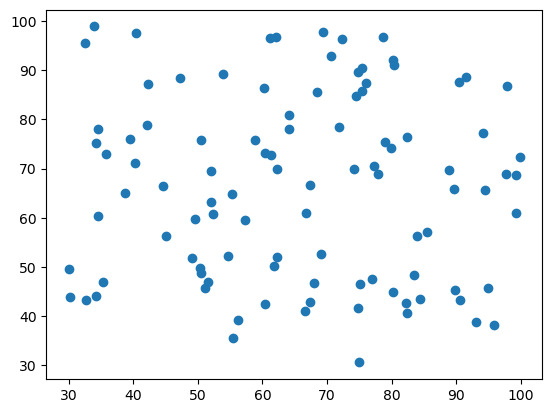

In [99]:

# plot_data()
plt.scatter(X_train[:, 0], X_train[:, 1])

In [100]:
2 * X_train[0]

array([ 69.24731925, 156.04938563])

2.4 Cost function for logistic regression

In [101]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))


def compute_cost(x,y,w,b, lambda_= 1):
    n = x.shape[0]
    cost = 0
    for i in range(n):
        f_wb = sigmoid(np.dot(x[i],w) + b)
        cost += -y[i]*np.log(f_wb) - ((1 - y[i]) * np.log(1 - f_wb))
    return cost / n


In [102]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))
# cost

Cost at initial w (zeros): 0.693


In [103]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


Cost at test w,b: 0.218


2.5 Gradient for logistic regression

In [104]:
def compute_gradient(X,Y,w,b):
    m = X.shape[0]
    prediction = sigmoid(np.dot(X, w) + b)
    cost_b = np.sum(prediction - Y)
    cost_w = np.dot(X.T, (prediction - Y))

    return cost_b / m, cost_w/m


In [105]:
def compute_gradient(X, y, w, b, lambda_=None): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                  
        
    return dj_db, dj_dw

In [106]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


In [107]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# UNIT TESTS    
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [-44.831353617873795, -44.37384124953978]
All tests passed!


2.6 Learning parameters using gradient descent

In [108]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [109]:
np.random.rand(2)

array([0.68650093, 0.83462567])

In [110]:
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
intial_w

array([[-0.00481712],
       [ 0.00250144]])

In [111]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)
print(f"w and b are : {w}, {b}")

Iteration    0: Cost     1.01   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   
w and b are : [0.07125349 0.06482881], -8.188614567810179


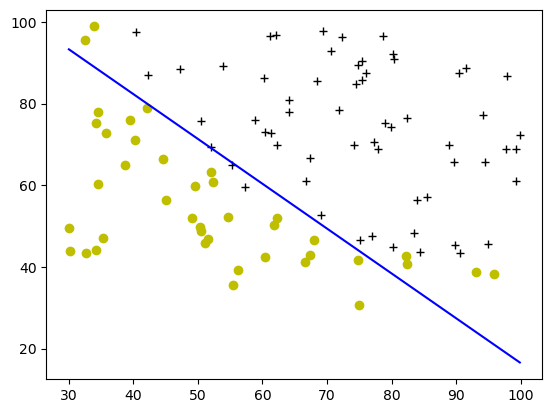

In [112]:
plot_decision_boundary(w,b,X_train,y_train)

In [113]:
def predict(X, w, b):
    pred = sigmoid(np.dot(X, w) + b)
    pred = np.where(pred > 0.5, 1, 0)
    return pred


In [114]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)

Output of predict: shape (4,), value [0 1 1 1]
All tests passed!


In [115]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000
